In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

### PART 1 - CLASSIFICATION :

In [4]:
# UPLOADING THE DATASET:
df=pd.read_csv(r'C:\Users\Gabi\Desktop\CLASSIFICATION DATASET.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [5]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


### Purpose explenation:
##### we will try to predict by very basic data if the type of lesion that you have is cancerous, because of that we will drop the "lesion_id" and the "image_id" that showing us the pictures of the lesions.

In [6]:
# droping the lesion_id column and image_id column
df.drop('lesion_id',axis=1,inplace=True)
df.drop('image_id',axis=1,inplace=True)
df

,dx,dx_type,age,sex,localization
0,bkl,histo,80.0,male,scalp
1,bkl,histo,80.0,male,scalp
2,bkl,histo,80.0,male,scalp
3,bkl,histo,80.0,male,scalp
4,bkl,histo,75.0,male,ear
...,...,...,...,...,...
10010,akiec,histo,40.0,male,abdomen
10011,akiec,histo,40.0,male,abdomen
10012,akiec,histo,40.0,male,abdomen
10013,akiec,histo,80.0,male,face


#### explenation about the fetchers:

* localization - where(the part) of the body the lesion was found.
* sex - the sex of the human.
* age - the age of the human.
* dx - 'dx' is a short for diagnosis(wich type of lesion do you have)
* dx_type - the type of way that the diagnosis was made.

In [7]:
#checking for null in the dataset
df.isnull().sum()

dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [8]:
#showing the null by pracent.
(df.isnull().sum()/df.isnull().count())*100

dx              0.000000
dx_type         0.000000
age             0.569146
sex             0.000000
localization    0.000000
dtype: float64

In [9]:
# i have decided to delete the null rows because if we dont know the age for sure it can not help us. 
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [11]:
# right now i have decided to make a dictionary for "dx" to understand which one of the lesions is cancerous and there
#full names.
dx_dict = {'dx':['nv','mel','bkl','bcc','akiec','vasc','df'],
           'dx full names':['Melanocytic nevi','Melanoma','Benign keratosis','Basal cell carcinoma',
            'Actinic keratoses','Vascular lesions','Dermatofibroma'],
          'cancerous':['no','yes','no','yes','yes','no','no']}

In [12]:
df1 = pd.DataFrame(dx_dict)
df1

,dx,dx full names,cancerous
0,nv,Melanocytic nevi,no
1,mel,Melanoma,yes
2,bkl,Benign keratosis,no
3,bcc,Basal cell carcinoma,yes
4,akiec,Actinic keratoses,yes
5,vasc,Vascular lesions,no
6,df,Dermatofibroma,no


#### Vizualization:

Text(0.5, 0, 'Disease')

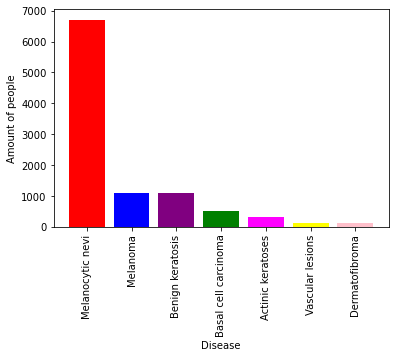

In [13]:
# showing all the types od the lesions the "dx" and how many people have that lesion.
labels = ['Melanocytic nevi','Melanoma','Benign keratosis','Basal cell carcinoma','Actinic keratoses',
          'Vascular lesions','Dermatofibroma']
value = [6705,1113,1099,514,327,142,115]
plt.bar(labels,value,color=['red', 'blue', 'purple', 'green', 'fuchsia','yellow','pink'])
plt.xticks(labels, rotation='vertical')
plt.ylabel('Amount of people')
plt.xlabel('Disease')

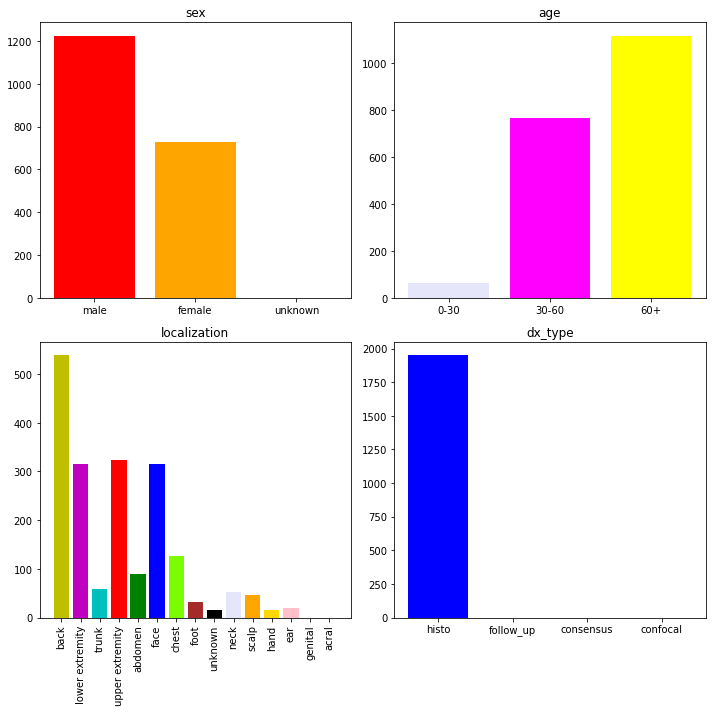

In [14]:
# we want to show the frequancy about our data while we taking all the canceraus lesions.
fig, axs = plt.subplots(1, 3,figsize = (10,10))

g = (df.dx == 'bcc')|(df.dx == 'mel')|(df.dx == 'akiec')

plt.subplot(2,2,1)
xlabels = ['male','female','unknown']
ylabels = [len(df[(df.sex=='male') & g]) ,len(df[(df.sex=='female') & g]),len(df[(df.sex=='unknown') & g])]
plt.bar(xlabels, ylabels,color=['r','orange'])
plt.title("sex")

plt.subplot(2,2,2)
xlabels = ['0-30','30-60','60+']
ylabels = [len(df[(df.age <= 30) & g]) ,len(df[(df.age>30) & (df.age<=60) & g]),len(df[(df.age>60) & g])]
plt.bar(xlabels, ylabels,color=['lavender','fuchsia','yellow'])
plt.title("age")

plt.subplot(2,2,3)
xlabels = [ 'back','lower extremity','trunk','upper extremity','abdomen','face','chest','foot','unknown','neck','scalp',
          'hand','ear','genital','acral']
ylabels = [len(df[(df.localization == 'back') & g]),len(df[(df.localization == 'lower extremity') & g]),len(df[(df.localization == 'trunk') & g]),
len(df[(df.localization == 'upper extremity') & g]),len(df[(df.localization == 'abdomen') & g]),len(df[(df.localization == 'face') & g]),
len(df[(df.localization == 'chest') & g]),len(df[(df.localization == 'foot') & g]),len(df[(df.localization == 'unknown') & g]),
len(df[(df.localization == 'neck') & g]),len(df[(df.localization == 'scalp') & g]),len(df[(df.localization == 'hand') & g]),
len(df[(df.localization == 'ear') & g]),len(df[(df.localization == 'genital') & g]),len(df[(df.localization == 'acral') & g])]
plt.bar(xlabels, ylabels,color=['y','m','c','r','g','b','lawngreen','brown','k','lavender','orange','gold','pink'])
plt.xticks(xlabels, rotation='vertical')
plt.title("localization")

plt.subplot(2,2,4)
xlabels = ['histo','follow_up','consensus','confocal']
ylabels = [len(df[(df.dx_type == 'histo') & g]) ,len(df[(df.dx_type=='follow_up') & g]),
         len(df[(df.dx_type == 'consensus') & g]),len(df[(df.dx_type=='confocal') & g])]
plt.bar(xlabels, ylabels,color=['b','fuchsia','yellow','g'])
plt.title("dx_type")


plt.tight_layout()

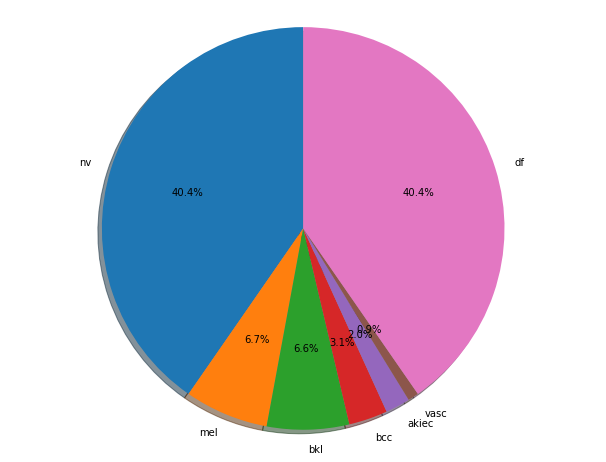

In [15]:
#here we can see the dx by pracents
length_dx =len(df['dx'])

labels = 'nv','mel','bkl','bcc','akiec','vasc','df'
sizes = [(len(df[df.dx=='nv'])/length_dx*100),(len(df[df.dx=='mel'])/length_dx*100),
         (len(df[df.dx=='bkl'])/length_dx*100),(len(df[df.dx=='bcc'])/length_dx*100),
         (len(df[df.dx=='akiec'])/length_dx*100),(len(df[df.dx=='vasc'])/length_dx*100),
         (len(df[df.dx=='nv'])/length_dx*100)]
explode = (0,0,0,0,0,0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout(-8)

plt.show()

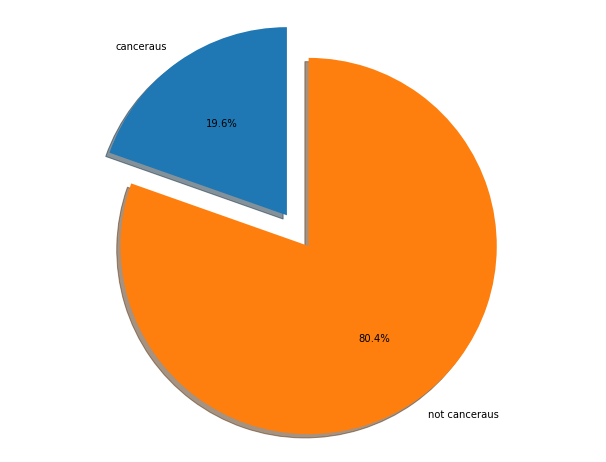

In [16]:
#here we want to check by pracents how many of the lesions are canceraus.
length_dx =len(df['dx'])

labels = 'canceraus','not canceraus'
sizes = [((len(df[df.dx=='mel']))+(len(df[df.dx=='bcc']))+(len(df[df.dx=='akiec'])))/length_dx*100,
100-((len(df[df.dx=='mel']))+(len(df[df.dx=='bcc']))+(len(df[df.dx=='akiec'])))/length_dx*100]
explode = (0.2,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout(-8)

plt.show()

In [17]:
# we will make the same datafeame as df but he will be numerical.
df2 = df

df2.replace(['male','female'],[0,1],inplace=True)

df2.replace(['mel','bcc','akiec','bkl','vasc','df','nv'],[0,0,0,1,1,1,1],inplace=True)

df2.replace([ 'back','lower extremity','trunk','upper extremity','abdomen','face','chest','foot','unknown','neck','scalp',
          'hand','ear','genital','acral'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],inplace=True)
df2.replace(['histo','follow_up','consensus','confocal'],[1,2,3,4],inplace=True)

In [18]:
df2

,dx,dx_type,age,sex,localization
0,1,1,80.0,0,11
1,1,1,80.0,0,11
2,1,1,80.0,0,11
3,1,1,80.0,0,11
4,1,1,75.0,0,13
...,...,...,...,...,...
10010,0,1,40.0,0,5
10011,0,1,40.0,0,5
10012,0,1,40.0,0,5
10013,0,1,80.0,0,6


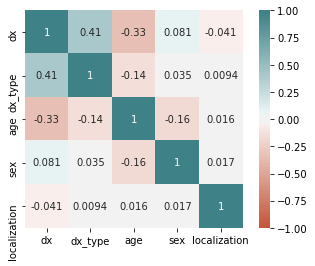

In [19]:
#the corralation heatmap.
corr = df2.corr()
sns.heatmap(corr,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),df
    square=True,annot=True)
plt.show()

## Prediction :

In [20]:
#showing the data shape that we will predict.
df2.shape

(9958, 5)

In [22]:
#this is the dummy model , our goal is to achive better results than his.
X = df2.drop('dx',axis=1)
y= df2['dx']
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.803976702149026

#### We will try to predict in two different ways (two different models) rhe first will be Knn and the secomf will be Logisticregression

Text(0, 0.5, 'Accuracy')

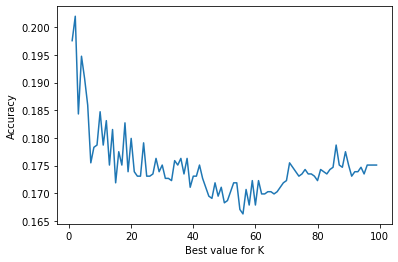

In [23]:
# Here we will find the best k(best number of neighbors) to predict with.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
err_rate=[] 
for i in range(1,100):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train,y_train)
    bestK=k.predict(X_test)
    err_rate.append(np.mean(bestK != y_test))

plt.plot(range(1,100),err_rate)
plt.xlabel('Best value for K')
plt.ylabel('Accuracy')

In [24]:
# we will train and test the knn model
knn = KNeighborsClassifier(n_neighbors=58)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8321285140562249


In [25]:
#showing the confusion matrix
print(confusion_matrix(y_test,y_pred))

[[ 204  281]
 [ 137 1868]]


In [26]:
#showing the precision,recall,f1-score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.42      0.49       485
           1       0.87      0.93      0.90      2005

    accuracy                           0.83      2490
   macro avg       0.73      0.68      0.70      2490
weighted avg       0.82      0.83      0.82      2490



In [27]:
# predicting with our second model,in the way of logisticregression
clf =LogisticRegression().fit(X_train, y_train)
ans = clf.predict(X_test)
print("Accuracy:",clf.score(X, y))

Accuracy: 0.8195420767222333


In [28]:
#showing the confusion matrix
print(confusion_matrix(y_test,ans))

[[ 188  297]
 [ 122 1883]]


In [29]:
#showing the precision,recall,f1-score
print(classification_report(y_test,ans))

              precision    recall  f1-score   support

           0       0.61      0.39      0.47       485
           1       0.86      0.94      0.90      2005

    accuracy                           0.83      2490
   macro avg       0.74      0.66      0.69      2490
weighted avg       0.81      0.83      0.82      2490



### PART 2 - REGRESSION

In [138]:
# UPLOADING THE DATASET:
rdf=pd.read_csv(r'C:\Users\Gabi\Desktop\regression dataset.csv')
rdf

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [139]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Purpose explenation:
we will try to preduct the house price by using the data that we have in our dataset.

#### explenation about the fetchers:
- id - an id for each house that sold.
- date - the date the hose sold.
- price - the price that the house sold.
- bedrooms - how many bedrooms are in the house.
- bathrooms - how many bathrooms are in the house.
- sqft_living - square footage of the apartments interior living space.
- sqft_lot - square footage of the land space.
- floors - number of floors inside the house
- waterfront - saing if the house is overlooking the waterfront or not
- view - an index from 0 to 4 of how good the view of the property is
- condition - an index from 1 to 5 on the condition of the apartment,
- grade - an index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [140]:
#checking for null variables.
rdf.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### we are not going to use the id column becaise it is not going to help us it is just an "id" for the house.

In [141]:
rdf.drop('id',axis = 1, inplace=True)
rdf

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [142]:
# we will write the date "prettier".
rdf['date'] = pd.to_datetime(rdf.date)
rdf

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [143]:
# after we chnged the date to look "prettier", i have decidet to drop this column and to use only the "year" column.
# in my opinion, for my purpose the "year" effection will be the same as the "date" effection.
rdf['year'] = pd.DatetimeIndex(rdf['date']).year
rdf.drop('date',axis = 1,inplace=True)
rdf

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


In [146]:
print('the mean is :',rdf['price'].mean())
print('the max price is :',rdf['price'].max())
print('the min price is :',rdf['price'].min())

the mean is : 540182.1587933188
the max price is : 7700000.0
the min price is : 75000.0


### vizualization:

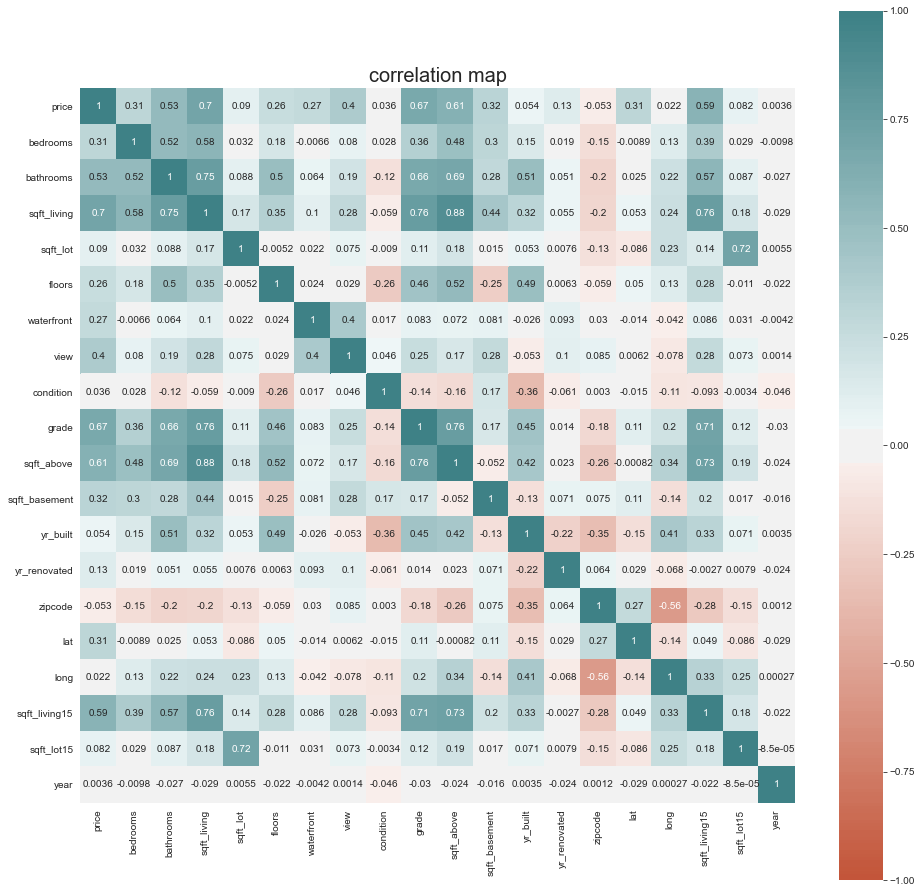

In [159]:
# we will show the correlation between the fetchers,(for us the price row is the most important)
plt.figure(figsize=(16,16))
plt.title("correlation map",fontsize =20)
corr2 = rdf.corr()
sns.heatmap(corr2,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True,annot=True,)
plt.show()

In [160]:
# this is helping us to see the correlation between the fethers and the column 'price'.
rdf.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
year             0.003554
zipcode         -0.053168
Name: price, dtype: float64

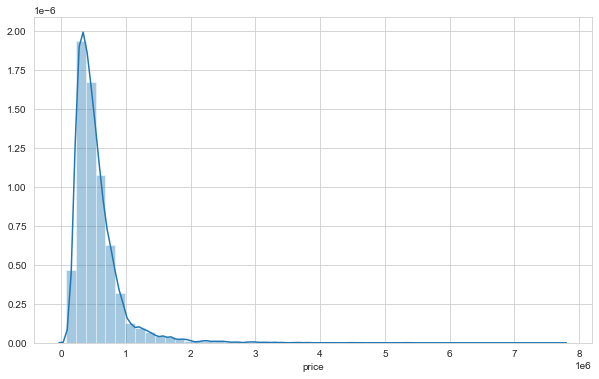

In [161]:
#here we can see that the majority of the houses were saled between the prices of 0-1 milion dollars.
plt.figure(figsize=(10,6))
sns.distplot(rdf["price"])

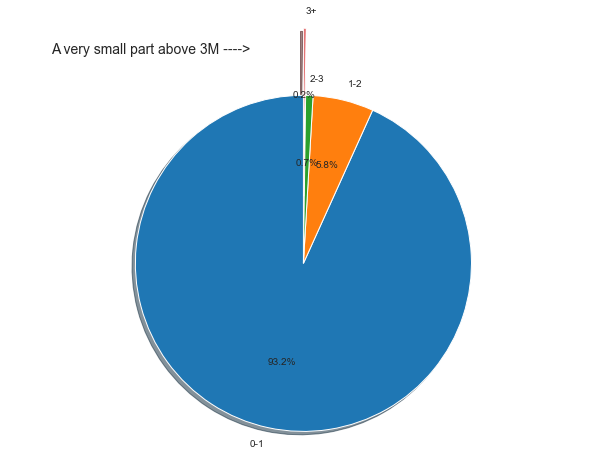

In [162]:
length_price =len(rdf['price'])

labels = '0-1','1-2','2-3','3+'
sizes = [(len(rdf[rdf.price<=1000000])/length_price*100),(len(rdf[(rdf.price>1000000)&(rdf.price<=2000000)])/length_price*100),
         (len(rdf[(rdf.price>2000000)&(rdf.price<=3000000)])/length_price*100),(len(rdf[rdf.price>3000000])/length_price*100)]
explode = (0,0,0,0.4)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.text(-1.5,1.25,'A very small part above 3M ---->',bbox=dict(facecolor='white', alpha=0.5), fontsize=14) 
plt.tight_layout(-8)  
plt.show()

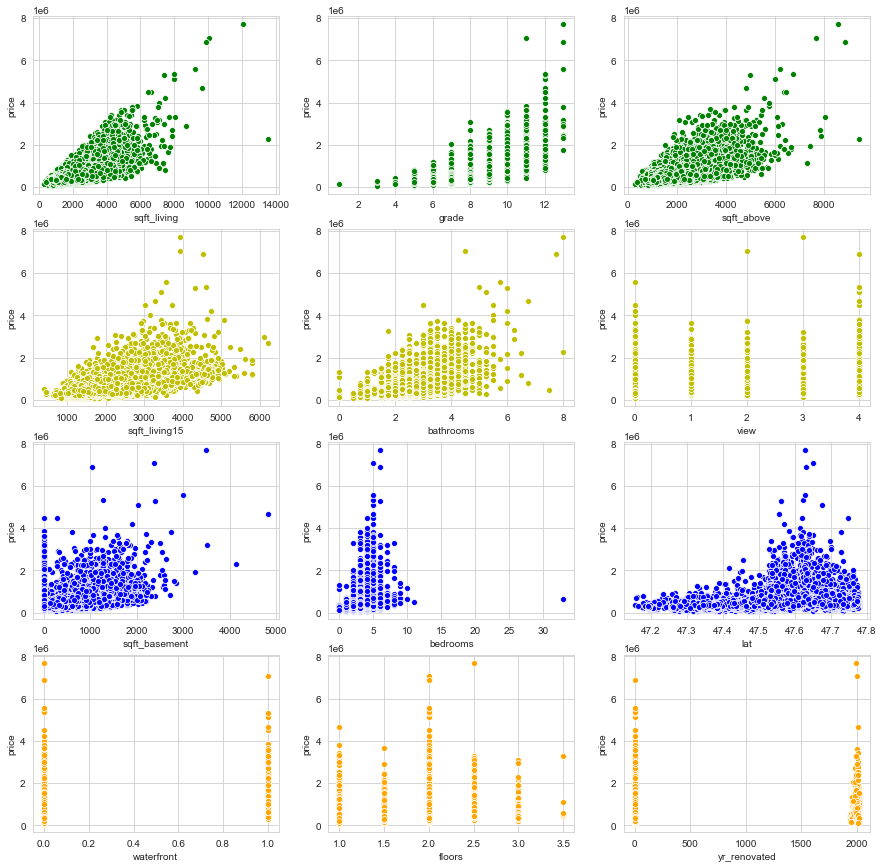

In [198]:
# we want to learn about the most 12 influencing fetchers in our dataset.
plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
sns.scatterplot(x="sqft_living", y="price", data=rdf,color="g")

plt.subplot(4,3,2)
sns.scatterplot(x="grade", y="price", data=rdf,color="g")

plt.subplot(4,3,3)
sns.scatterplot(x="sqft_above", y="price", data=rdf,color="g")

plt.subplot(4,3,4)
sns.scatterplot(x="sqft_living15", y="price", data=rdf,color="y")

plt.subplot(4,3,5)
sns.scatterplot(x="bathrooms", y="price", data=rdf,color="y")

plt.subplot(4,3,6)
sns.scatterplot(x="view", y="price", data=rdf,color="y")

plt.subplot(4,3,7)
sns.scatterplot(x="sqft_basement", y="price", data=rdf,color="b")

plt.subplot(4,3,8)
sns.scatterplot(x="bedrooms", y="price", data=rdf,color="b")

plt.subplot(4,3,9)
sns.scatterplot(x="lat", y="price", data=rdf,color="b")

plt.subplot(4,3,10)
sns.scatterplot(x="waterfront", y="price", data=rdf,color="orange")

plt.subplot(4,3,11)
sns.scatterplot(x="floors", y="price", data=rdf,color="orange")

plt.subplot(4,3,12)
sns.scatterplot(x="yr_renovated", y="price", data=rdf,color="orange")

In [252]:
X = rdf.drop('price',axis=1)
y = rdf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
reg = LinearRegression().fit(X_train,y_train)
reg.predict(X_test)
reg.score(X, y)

0.7009174636761387

In [253]:
reg.coef_

array([-3.51059791e+04,  4.03905114e+04,  1.07587146e+02,  2.06564087e-01,
        8.73720716e+03,  5.54669431e+05,  5.02143264e+04,  2.83646385e+04,
        9.88325916e+04,  6.44698672e+01,  4.31172794e+01, -2.54211847e+03,
        2.37964300e+01, -5.49678869e+02,  5.98473285e+05, -2.08775450e+05,
        2.34885131e+01, -4.44500952e-01,  2.99409978e+04])

In [251]:
reg.intercept_

-54614147.83007333

In [256]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy = 'median')
dummy_regr.fit(X, y)
dummy_regr.predict(X)
dummy_regr.score(X, y)

-0.0602659961842551

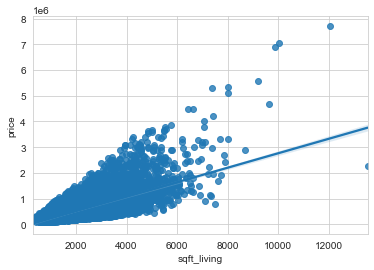

In [259]:
sns.regplot(x = rdf['sqft_living'], y = rdf['price'])

In [264]:
model = smf.ols('price ~ sqft_living', data=rdf)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:41:39   Log-Likelihood:            -3.0028e+05
No. Observations:               21613   AIC:                         6.006e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.387e+04   4405.455     -9.958      0.000   -5.25e+04   -3.52e+04
sqft_living   280.8067      1.938    144.924      0.000     277.009     284.605
==============================================================================
Omnibus:                    14815.593   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           543533.863
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.911   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""